# **1) Rainfall Forecasting with ARIMA**
We use ARIMA (AutoRegressive Integrated Moving Average) to forecast rainfall based on historical data. The steps include checking for stationarity, fitting the ARIMA model, and forecasting future values.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller


# Load dataset

In [31]:
df = pd.read_csv("Crop_recommendation.csv")


# Extracting rainfall column

In [32]:
rainfall = df['rainfall']


# Checking stationarity (ADF test)

In [33]:
result = adfuller(rainfall)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -3.38953014162007
p-value: 0.011321008714268511


# Fitting ARIMA model (example: ARIMA(2,1,2))

In [34]:
model = ARIMA(rainfall, order=(2,1,2))
model_fit = model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



# Forecasting next 1000 periods

In [35]:
forecast = model_fit.forecast(steps=1000)
print("Rainfall Forecast:", forecast)

Rainfall Forecast: 2200    148.982289
2201    149.416989
2202    150.298668
2203    150.873485
2204    151.293950
           ...    
3195    152.374824
3196    152.374824
3197    152.374824
3198    152.374824
3199    152.374824
Name: predicted_mean, Length: 1000, dtype: float64



# Plotting actual vs forecast

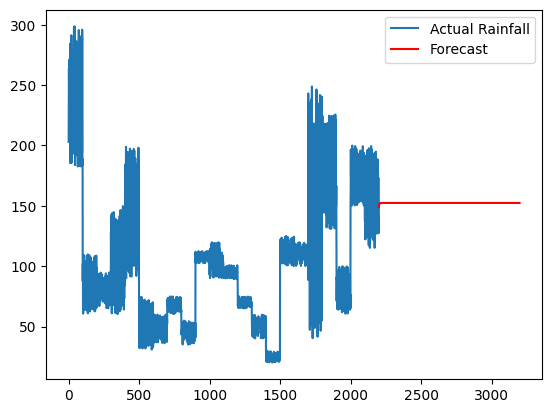

In [36]:
plt.plot(rainfall, label='Actual Rainfall')
plt.plot(range(len(rainfall), len(rainfall)+1000), forecast, color='red', label='Forecast')
plt.legend()
plt.show()

# **2) Cross-Correlation Between Rainfall and Crop Yield**
Cross-correlation helps us measure the relationship between rainfall and crop yield (here, the crop label is used as a proxy since we don’t have yield values). We encode the crop labels numerically and calculate the correlation at different time lags

In [37]:
import numpy as np
from statsmodels.tsa.stattools import ccf

# Converting label (crop type) to numeric form for analysis

In [38]:

crop_encoded = pd.factorize(df['label'])[0]  # encoding crops as numbers

# Compute cross-correlation

In [39]:
cross_corr = ccf(df['rainfall'], crop_encoded)

# Plotting cross-correlation

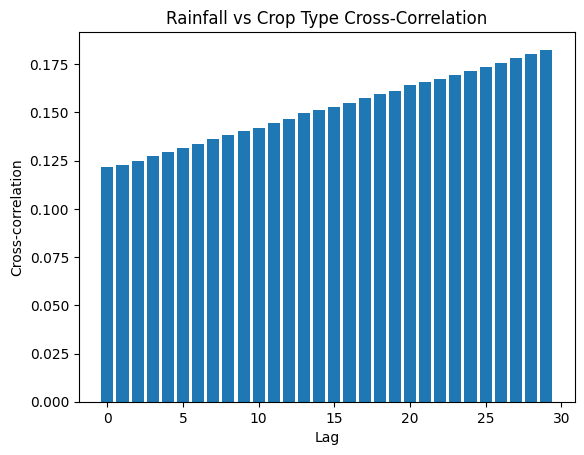

In [40]:
lags = np.arange(len(cross_corr))
plt.bar(lags[:30], cross_corr[:30])  # show first 30 lags
plt.xlabel("Lag")
plt.ylabel("Cross-correlation")
plt.title("Rainfall vs Crop Type Cross-Correlation")
plt.show()

# **3) Multivariate Time Series Models for Crop Suitability**
We can use a multivariate time series model such as Vector AutoRegression (VAR) to study the relationship between soil nutrients (N, P, K) and climatic factors (temperature, humidity, pH, rainfall). This helps forecast future conditions, which can then be linked to predicting suitable crops.

In [41]:
from statsmodels.tsa.api import VAR

# Selecting multivariate features

In [42]:
features = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]

# Splitting train & test

In [43]:
train_size = int(len(features) * 0.8)
train, test = features[:train_size], features[train_size:]

# Fitting VAR model

In [44]:
model = VAR(train)
model_fit = model.fit(maxlags=5)

# Forecasting for test period

In [45]:
forecast = model_fit.forecast(train.values, steps=len(test))

# Converting to DataFrame

In [46]:
forecast_df = pd.DataFrame(forecast, columns=features.columns)
print(forecast_df.head())

           N          P          K  temperature   humidity        ph  \
0  45.373396  46.446611  48.397186    28.191632  93.382964  6.351222   
1  42.146550  46.898604  45.463001    28.685434  94.831615  6.162469   
2  40.373343  50.830511  45.002601    28.733708  92.334756  6.502139   
3  45.167719  51.202422  47.572672    29.320328  93.183120  6.451075   
4  46.207790  50.627997  46.881520    27.403155  93.308556  6.369656   

     rainfall  
0  160.262710  
1  174.599700  
2  187.743857  
3  179.489653  
4  175.283161  
